In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
from textblob import TextBlob

df = pd.read_csv(r'C:\Users\ayael\Downloads\archive (5)\twitter_training.csv')  

df.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']

print(df.head()) 


     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               Tweet  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [85]:

print ("number of duplicates :",df.duplicated().sum())
print("number of NA values :",df.isna().sum())

number of duplicates : 2700
number of NA values : ID             0
Topic          0
Sentiment      0
Tweet        686
dtype: int64


In [86]:
df = df.dropna()
df = df.drop_duplicates()  


C:\Users\ayael\AppData\Local\Temp\ipykernel_14844\1932322671.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


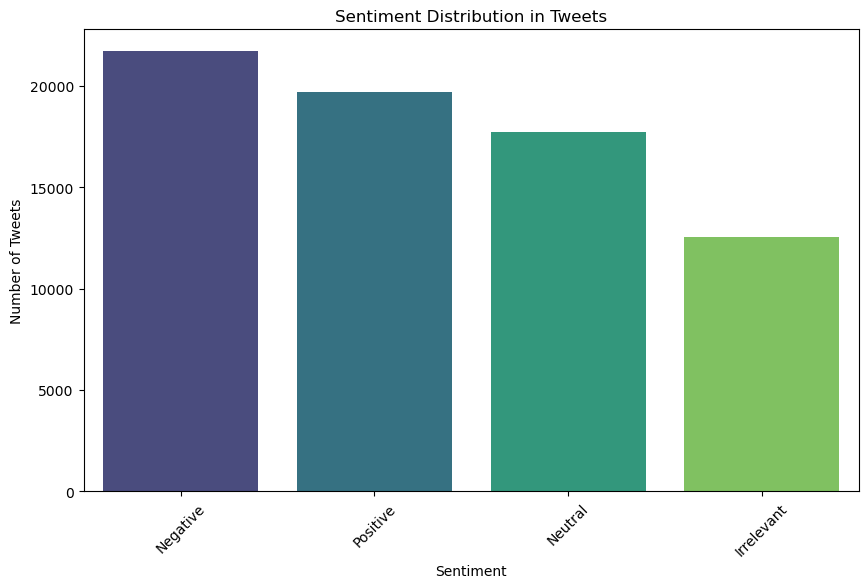

In [87]:
# Analyzing the Sentiment Distribution

sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

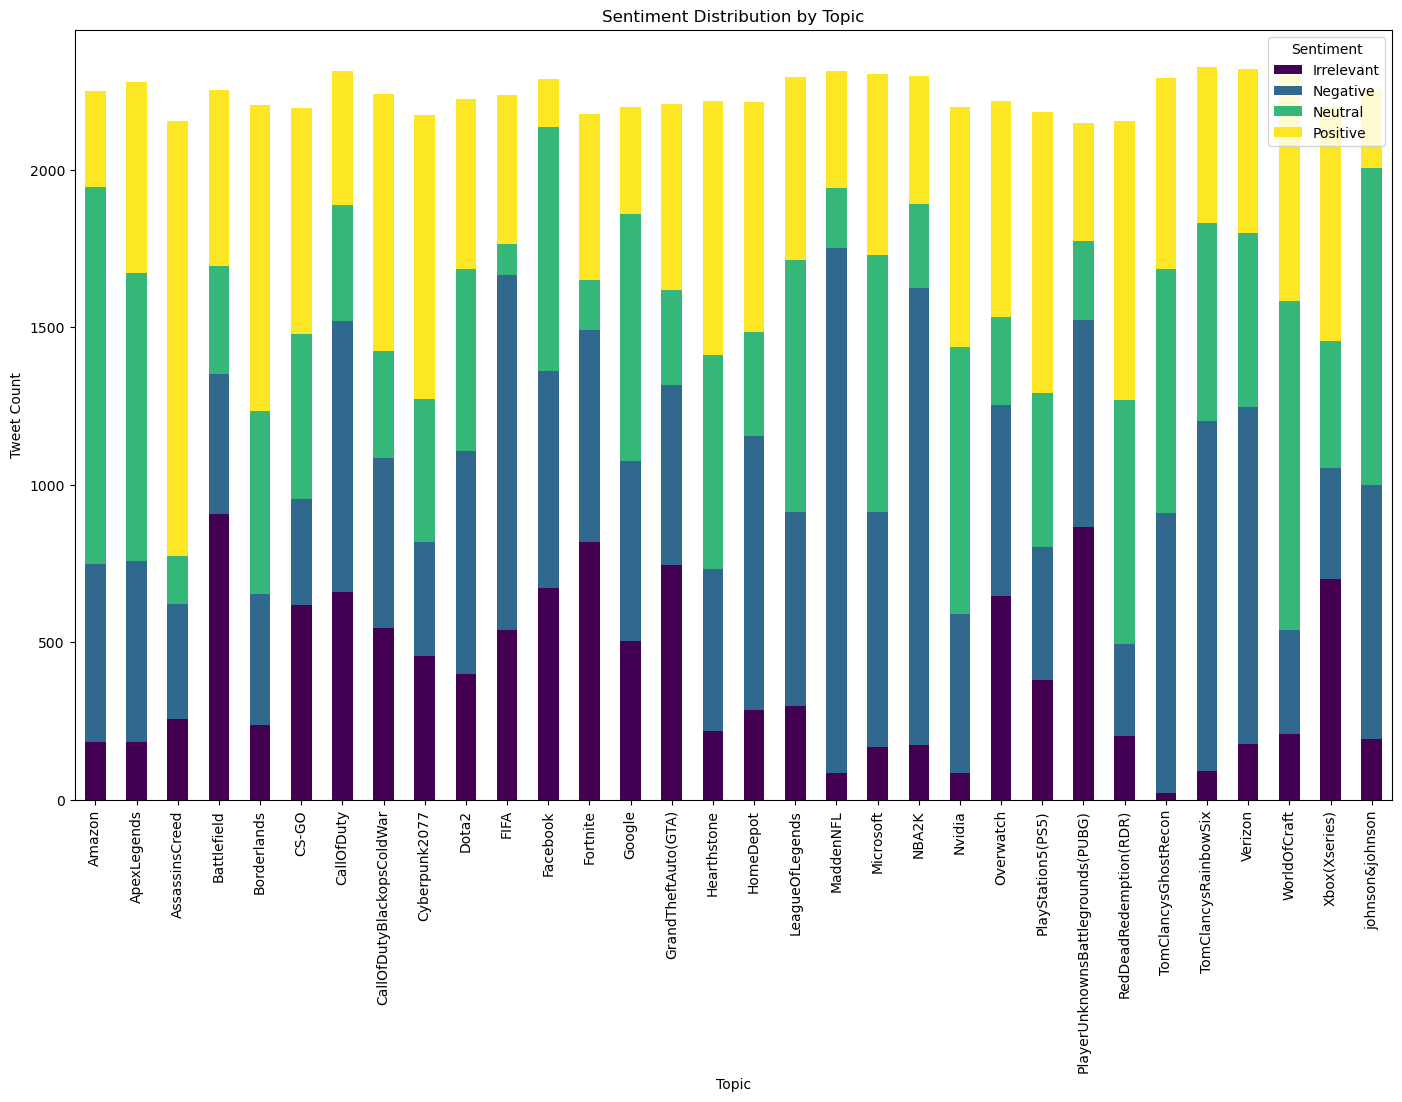

In [88]:
# Analyzing sentiment across specific topics

topic_sentiment_counts = df.groupby(['Topic', 'Sentiment']).size().unstack()
topic_sentiment_counts.plot(kind='bar', stacked=True, figsize=(17,10), colormap='viridis')
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Tweet Count')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.show()

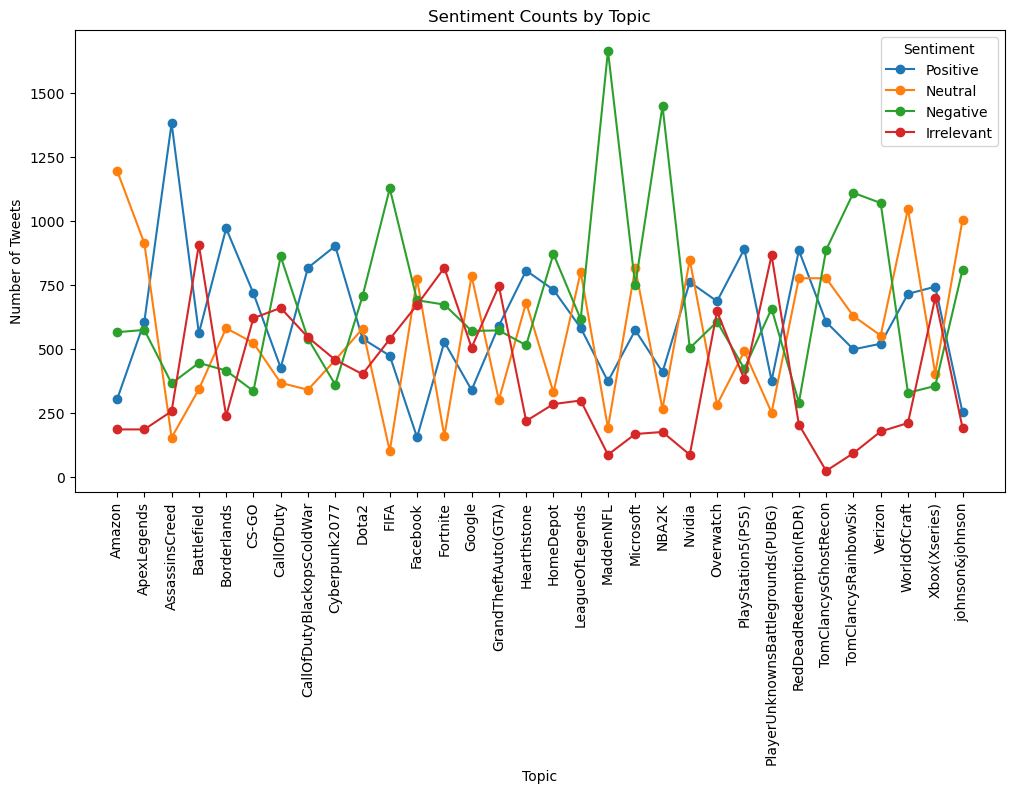

In [89]:
plt.figure(figsize=(12, 6))
for sentiment in df['Sentiment'].unique():
    plt.plot(topic_sentiment_counts.index, topic_sentiment_counts[sentiment], marker='o', label=sentiment)

plt.title('Sentiment Counts by Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.show()

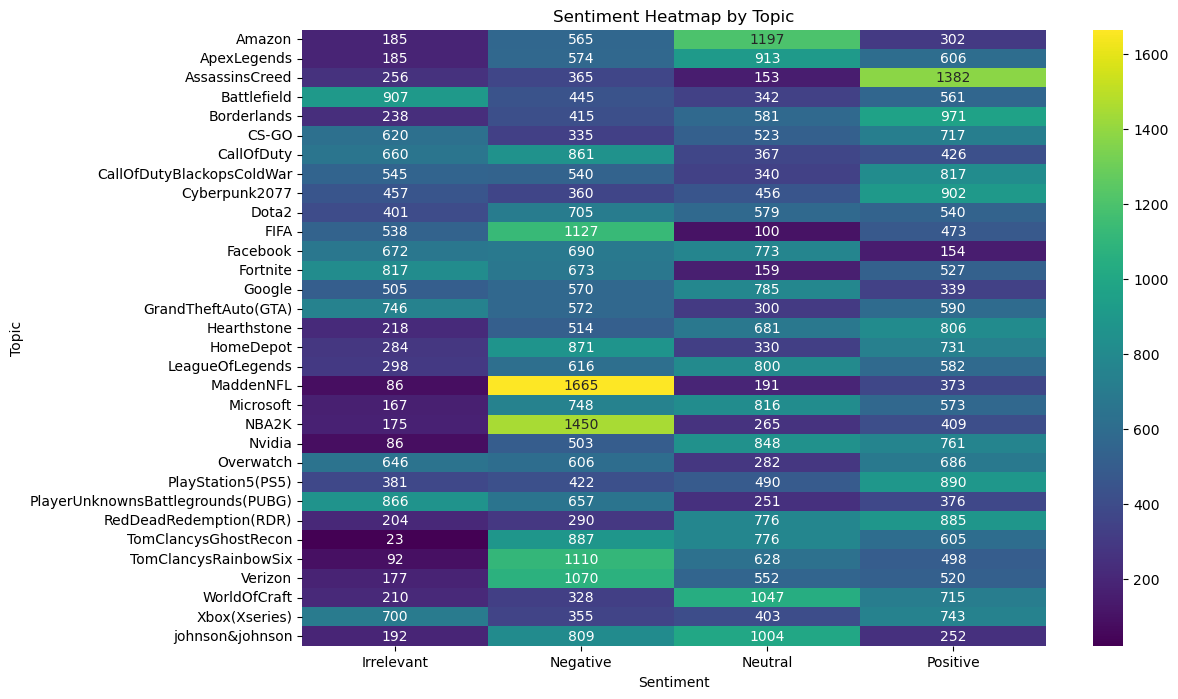

In [90]:
plt.figure(figsize=(12, 8))
sns.heatmap(topic_sentiment_counts, annot=True, cmap='viridis', fmt='d')
plt.title('Sentiment Heatmap by Topic')
plt.xlabel('Sentiment')
plt.ylabel('Topic')
plt.show()

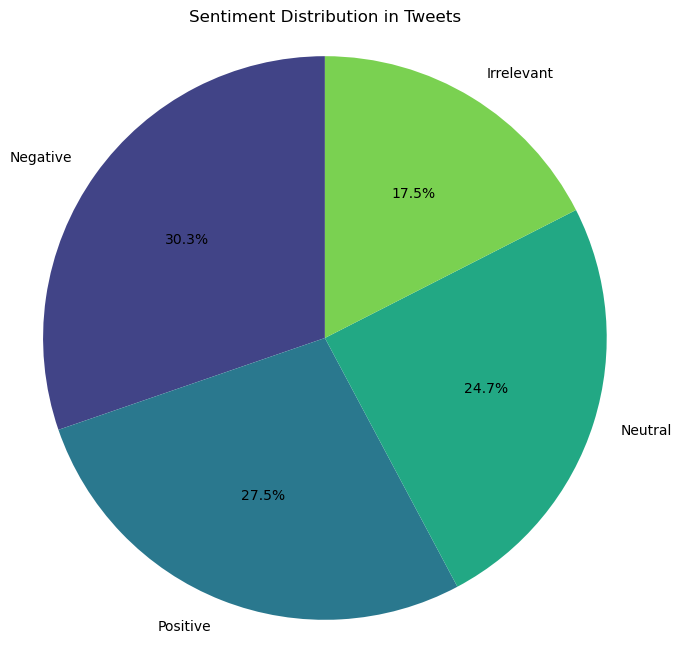

In [91]:
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', n_colors=len(sentiment_counts)))
plt.title('Sentiment Distribution in Tweets')
plt.axis('equal')  
plt.show()

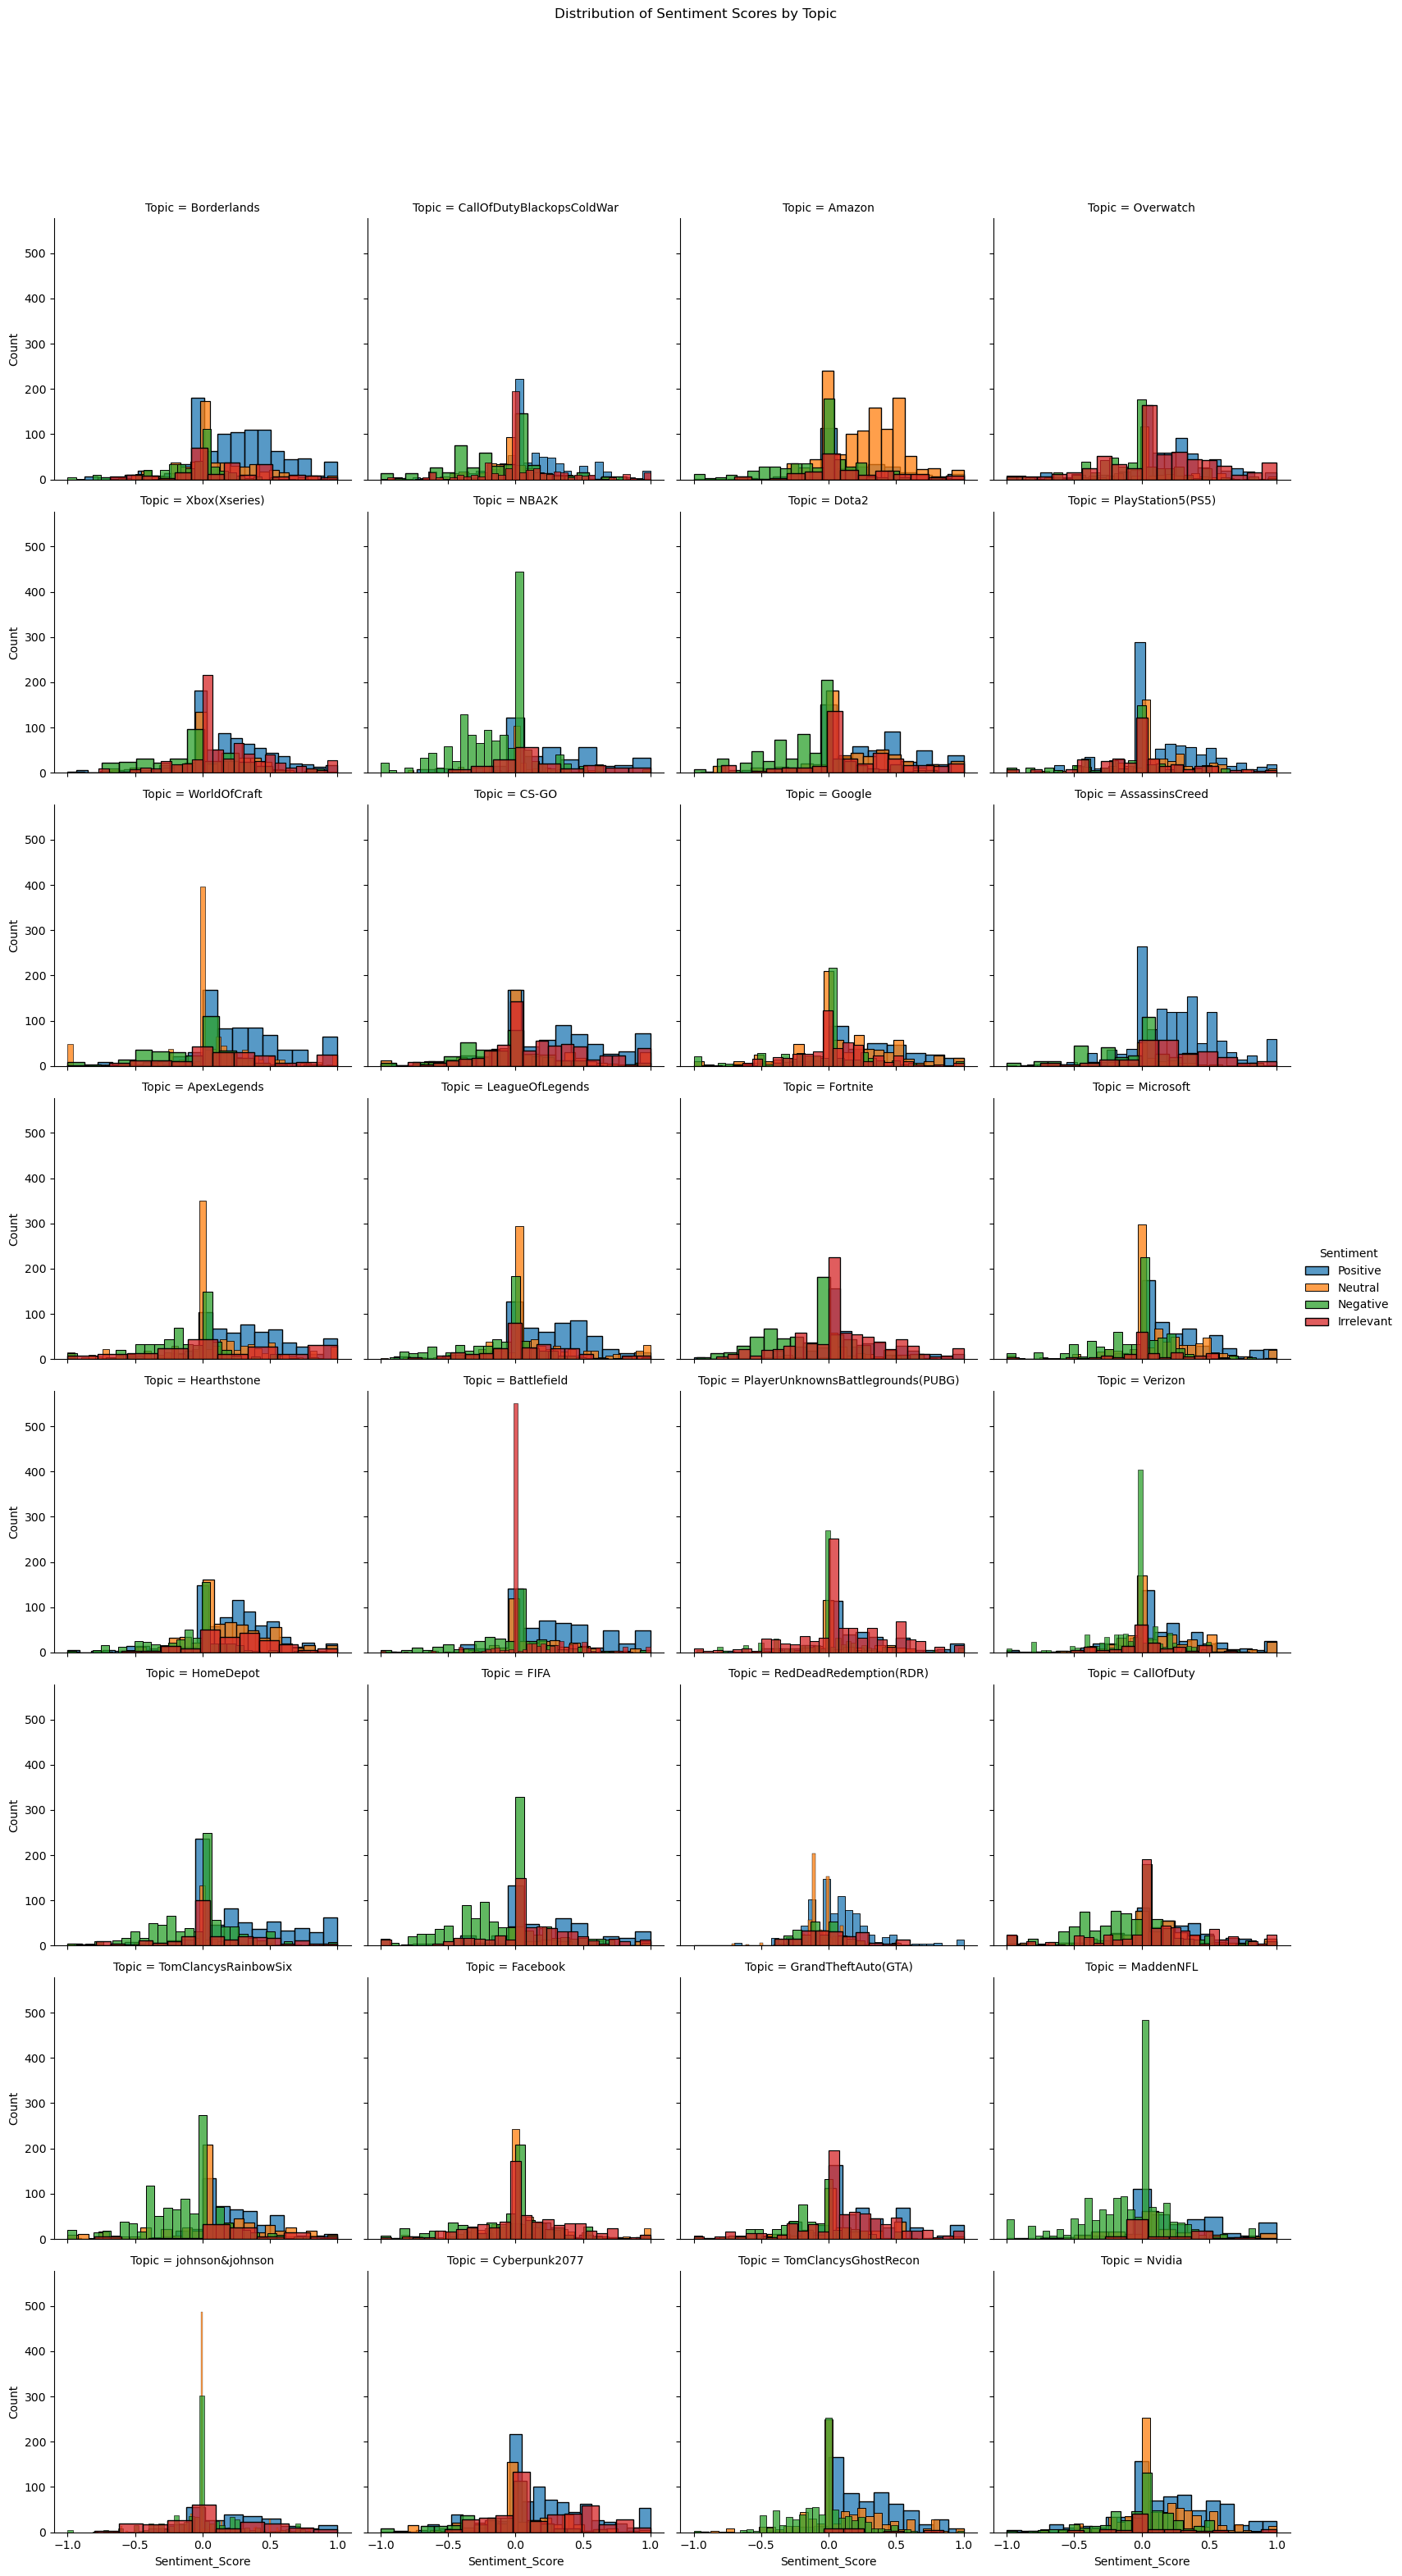

In [92]:
def get_sentiment_score(tweet):
    return TextBlob(tweet).sentiment.polarity  

df['Sentiment_Score'] = df['Tweet'].apply(get_sentiment_score)

g = sns.FacetGrid(df, col="Topic", hue="Sentiment", col_wrap=4, height=4)
g.map(sns.histplot, "Sentiment_Score")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Sentiment Scores by Topic')
plt.show()